In [569]:
# Library preparation
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, filters
from scipy import fftpack

In [570]:
# loading samples
img1 = cv2.imread('s01_light_daylight1.jpg')

In [571]:
# Image scaling

def image_dimensions_check(img):
    """ 
    Get dimensions of the image 
    
    Parameters: 
    img (ndarray): Image 
    
    Returns: 
    tuple: Dimensions of the image (height, width, channels) 
    """
    return img.shape()

def image_rescale(img):
    # write rescaling code here
    height, width = img.shape[:2]
    # Desired width 
    new_width = 1000 
    if width > new_width: 
        # Calculate the scaling factor 
        scaling_factor = new_width / width 
        # Calculate the new height while maintaining aspect ratio 
        new_height = int(height * scaling_factor) 
        # Rescale the image 
        rescaled_img = cv2.resize(img, (new_width, new_height)) 
        return rescaled_img 
    else: 
        # If width is already less than or equal to 1000, return the original image 
        return img
        
    

In [572]:
# Base image transfering functions

# Transfering samples to gray colors
def image_to_gray(img):
    """
    Transfer given image to gray

    Parameters:
    img (ndarray): Image

    Returns: 
    ndarray: Image converted to gray scale
    """
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Transfer image to binary image
def image_to_binary(img):
    """
    Transfer given image to binary image

    Parameters:
    img (ndarray): Image

    Returns: 
    ndarray: Image converted to binary image
    """
    _, binary_img = cv2.threshold(img, 127,255, cv2.THRESH_BINARY)
    return binary_img

# Gamma correction
def image_gamma_correction(img, c, gamma):
    """
    Add gamma correction to given image

    Parameters: 
    img (ndarray): Input image as a numpy array, where pixel values range from 0 to 255. 
    c (float): Constant multiplier, typically set to 1 for standard gamma correction. 
    gamma (float): Gamma value for the correction. Values >1 darken the image, while values <1 lighten it. 
    
    Returns: 
    ndarray: Gamma corrected image with pixel values ranging form 0 to 255.
    """
    img_corrected = c * (img / 255.0) ** gamma
    img_corrected = np.clip(img_corrected * 255.0, 0, 255).astype(np.uint8)
    return img_corrected

In [573]:
# Image filtering functions

# Butterworth filter
def butterworth_filter(image, cutoff, order):
    """ 
    Apply a Butterworth lowpass filter to an image. 
    
    Parameters: 
    image (ndarray): Input image. 
    cutoff (float): Cutoff frequency. 
    order (int): Order of the filter. 
    
    Returns: ndarray: Filtered image. 
    """ 
    rows, cols = image.shape 
    crow, ccol = rows // 2, cols // 2 
    
    # FFT 
    dft = fftpack.fftshift(fftpack.fft2(image)) 
    
    # Create Butterworth filter 
    u = np.arange(-ccol, ccol) 
    v = np.arange(-crow, crow) 
    U, V = np.meshgrid(u, v) 
    D = np.sqrt(U**2 + V**2) 
    H = 1 / (1 + (D / cutoff)**(2 * order)) 
    # Apply filter in frequency domain 
    dft_filtered = dft * H 
    # Inverse FFT to get the image back 
    filtered_img = np.abs(fftpack.ifft2(fftpack.ifftshift(dft_filtered)))

    return filtered_img

# Gausse filter
def gausse_filter(img, sigma):
    """
    Filter image by Gausse filration
    
    Parameters: 
    img (ndarray): Input image. 
    sigma (float): Standard deviation of the Gaussian noise. 
    
    Returns: ndarray: Image with Gausse filtration added. 
    """
    filtered_img = cv2.GaussianBlur(img, (0, 0), sigma)
    return filtered_img

# Median filter 
def median_filter(img, window):
    """
    Filter image by median filration
    
    Parameters: 
    img (ndarray): Input image. 
    window (int): window size [window x window]
    
    Returns: ndarray: Image with median filtration added. 
    """
    median_filtrated_img = cv2.medianBlur(img, window)
    return median_filtrated_img

In [574]:
# This is place to perform image processing

# image to gray
img1_gray = image_to_gray(img1)

# transfer image with gamma correction
img1_gamma1 = image_gamma_correction(img1_gray, 2, 1)
img1_gamma2 = image_gamma_correction(img1_gray, 2, 2)
img1_gamma3 = image_gamma_correction(img1_gray, 15, 10)




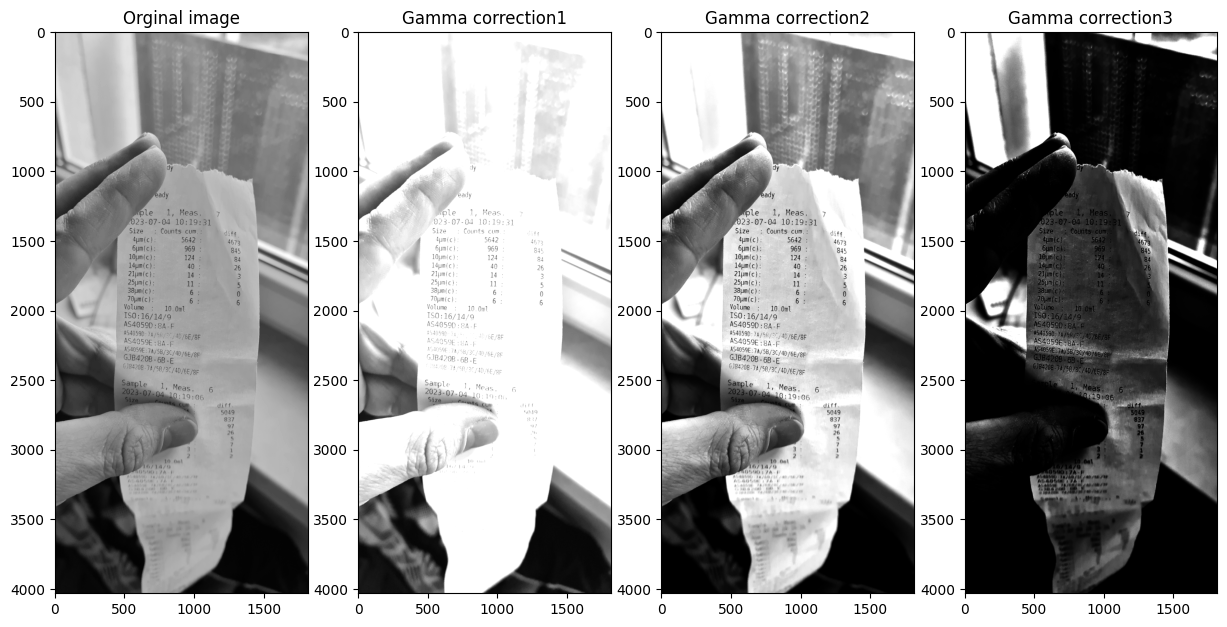

In [575]:
# Show filtered images
plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1), plt.imshow(img1_gray, cmap='gray'), plt.title('Orginal image') 
plt.subplot(1, 4, 2), plt.imshow(img1_gamma1, cmap='gray'), plt.title('Gamma correction1')
plt.subplot(1, 4, 3), plt.imshow(img1_gamma2, cmap='gray'), plt.title('Gamma correction2')
plt.subplot(1, 4, 4), plt.imshow(img1_gamma3, cmap='gray'), plt.title('Gamma correction3')

plt.show()

In [576]:
# Gamma correction - SUMMARY:
# choose the best gamma here:
img1_gamma_best = img1_gamma2

In [577]:
# image to binary
img1_binary = image_to_binary(img1_gamma_best)
img1_binary_from_base_img = image_to_binary(img1_gray)

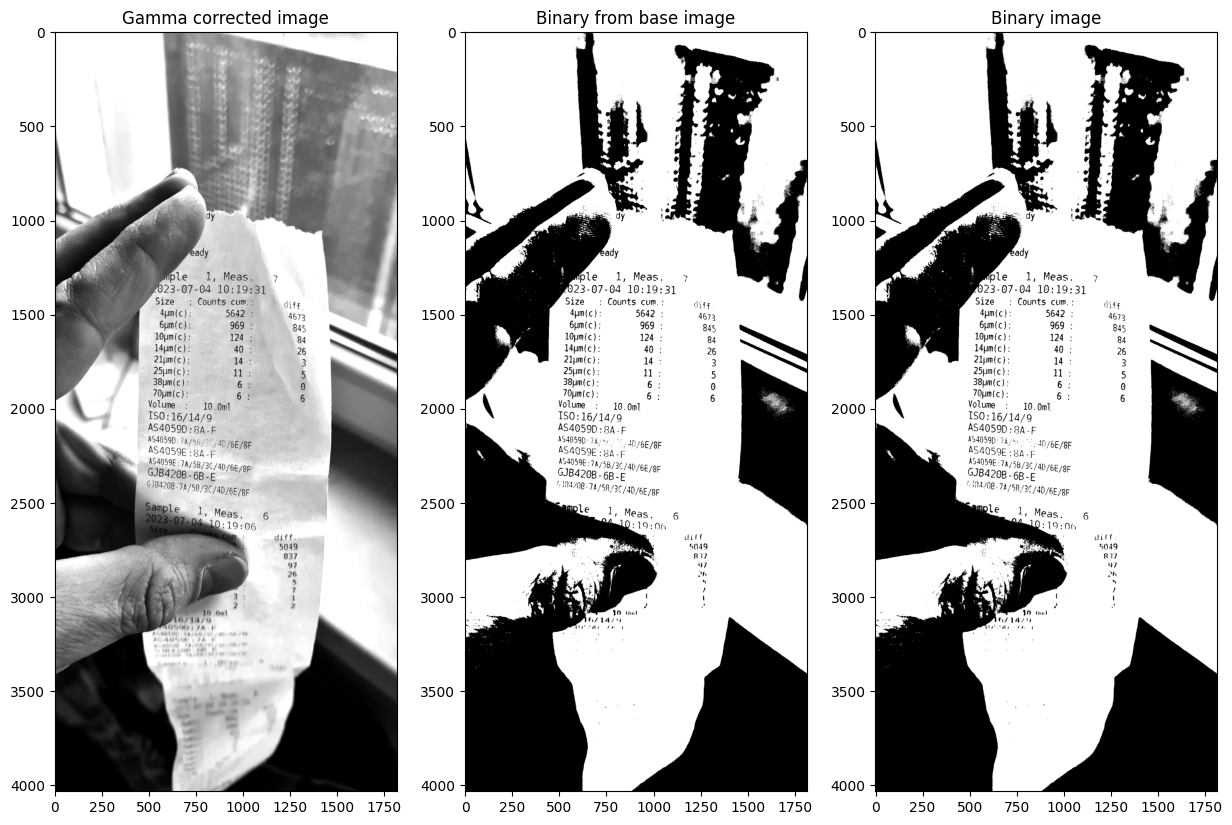

In [578]:
# Show filtered images
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1), plt.imshow(img1_gamma2, cmap='gray'), plt.title('Gamma corrected image') 
plt.subplot(1, 3, 2), plt.imshow(img1_binary_from_base_img, cmap='gray'), plt.title('Binary from base image')
plt.subplot(1, 3, 3), plt.imshow(img1_binary, cmap='gray'), plt.title('Binary image')
plt.show()

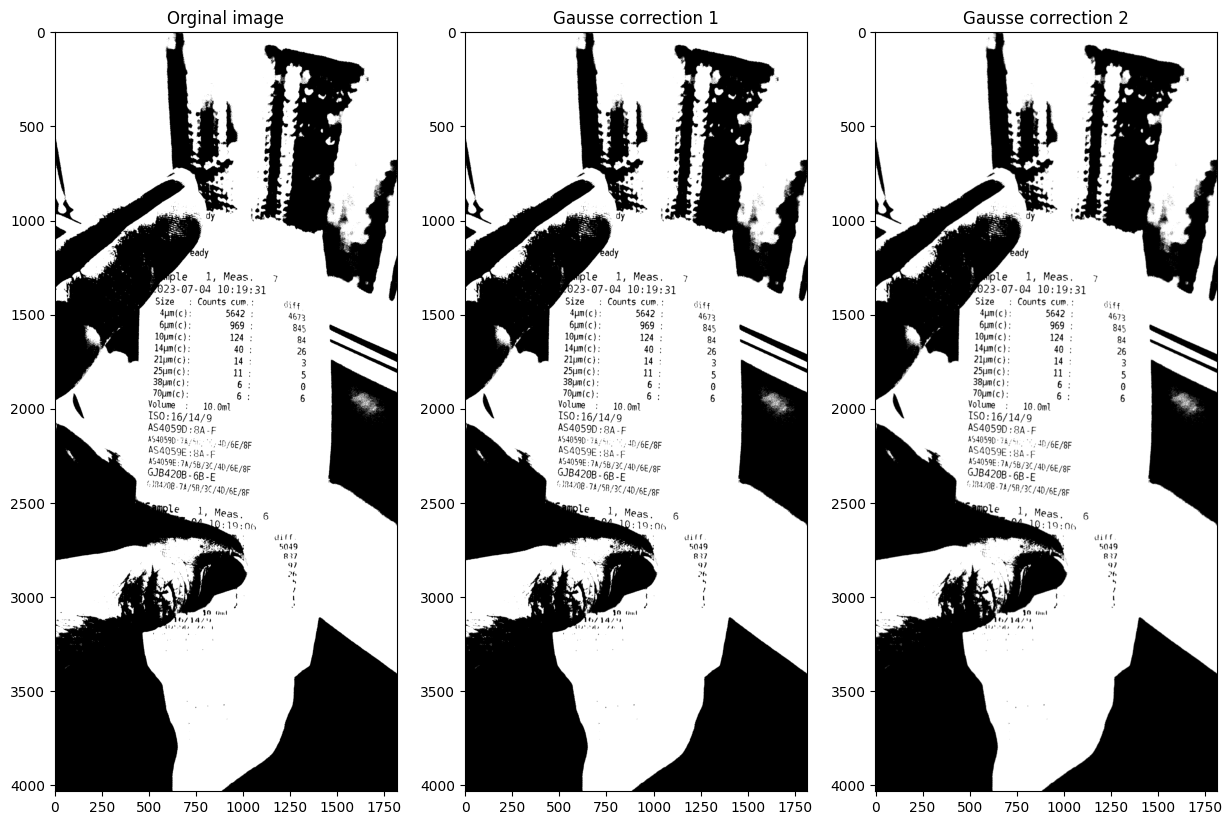

In [579]:
# code image GAUSSE filtering tests
img1_gausse_filter1 = gausse_filter(img1_binary, 0.5)
img1_gausse_filter2 = gausse_filter(img1_binary, 1)

# Show GAUSSE filtered images
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1), plt.imshow(img1_binary, cmap='gray'), plt.title('Orginal image') 
plt.subplot(1, 3, 2), plt.imshow(img1_gausse_filter1, cmap='gray'), plt.title('Gausse correction 1')
plt.subplot(1, 3, 3), plt.imshow(img1_gausse_filter2, cmap='gray'), plt.title('Gausse correction 2')
plt.show()


img1_butterworth_filter = butterworth_filter(img1_binary, 250, 70)

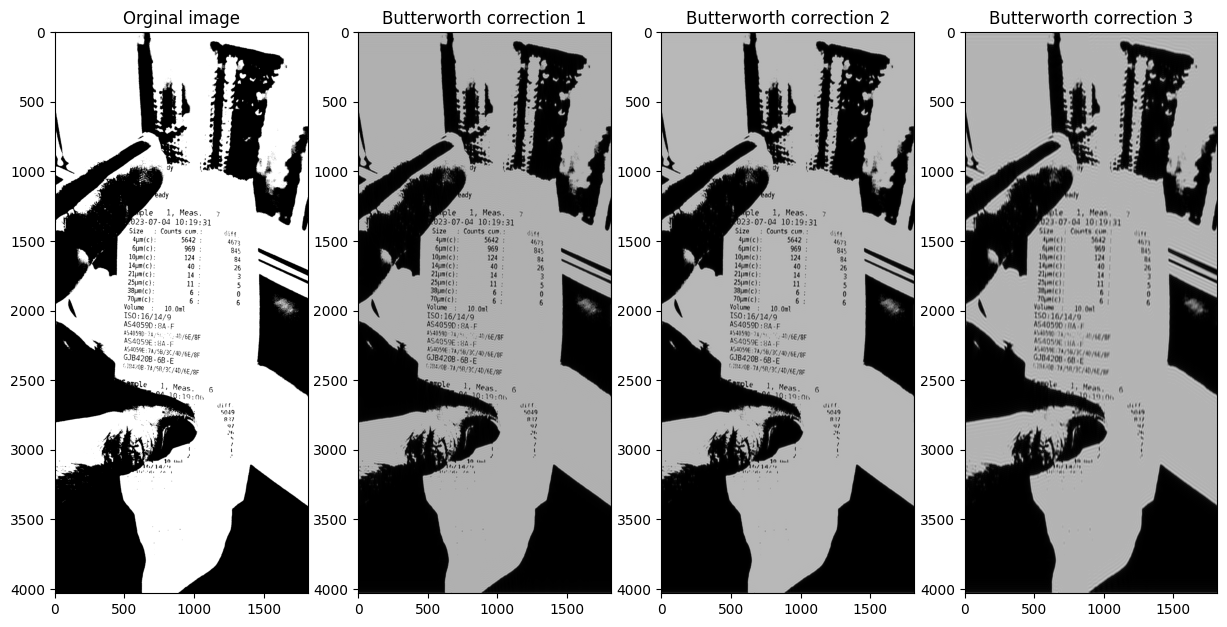

In [580]:
# code image BUTTERWORTH filtering tests
img1_butterworth_filter1 = butterworth_filter(img1_binary, 250, 70)
img1_butterworth_filter2 = butterworth_filter(img1_binary, 250, 10)
img1_butterworth_filter3 = butterworth_filter(img1_binary, 150, 20)

# Show BUTTERWORTH filtered images
plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1), plt.imshow(img1_binary, cmap='gray'), plt.title('Orginal image') 
plt.subplot(1, 4, 2), plt.imshow(img1_butterworth_filter1, cmap='gray'), plt.title('Butterworth correction 1')
plt.subplot(1, 4, 3), plt.imshow(img1_butterworth_filter2, cmap='gray'), plt.title('Butterworth correction 2')
plt.subplot(1, 4, 4), plt.imshow(img1_butterworth_filter3, cmap='gray'), plt.title('Butterworth correction 3')
plt.show()

In [581]:
# Butterworth correction - SUMMARY:
# choose the best butterworth img here:
img1_butter_best = img1_butterworth_filter2

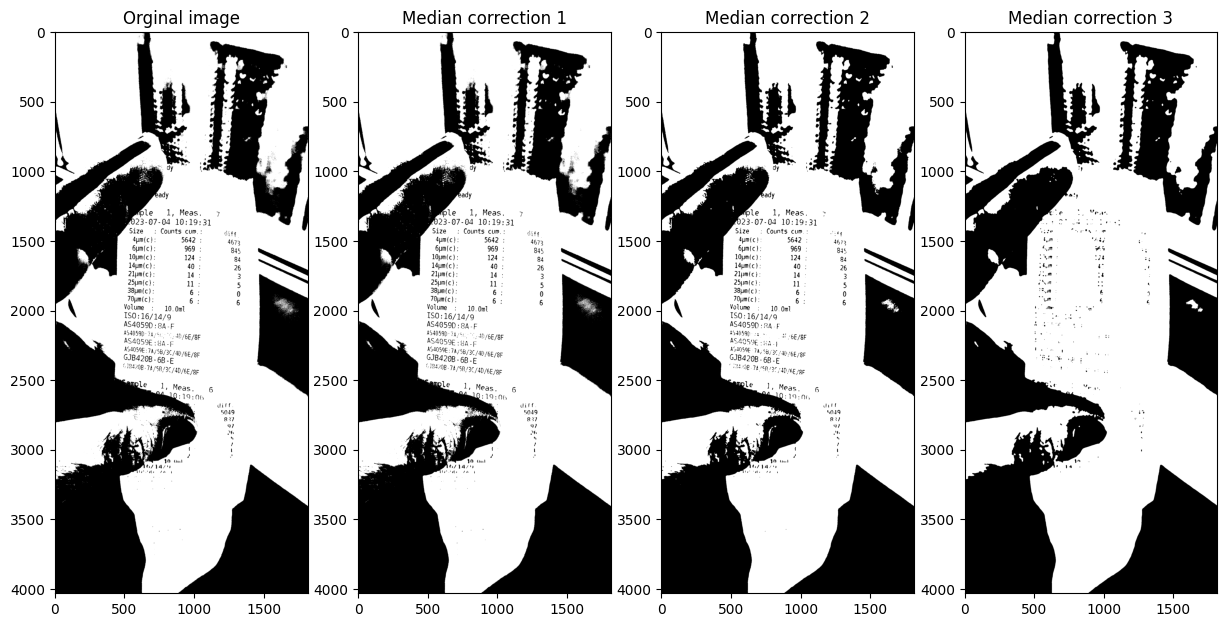

In [582]:
# code image MEDIAN filtering tests
img1_median_filter1 = median_filter(img1_binary, 1)
img1_median_filter2 = median_filter(img1_binary, 5)
img1_median_filter3 = median_filter(img1_binary, 11)

# Show MEDIAN filtered images
plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1), plt.imshow(img1_binary, cmap='gray'), plt.title('Orginal image') 
plt.subplot(1, 4, 2), plt.imshow(img1_median_filter1, cmap='gray'), plt.title('Median correction 1')
plt.subplot(1, 4, 3), plt.imshow(img1_median_filter2, cmap='gray'), plt.title('Median correction 2')
plt.subplot(1, 4, 4), plt.imshow(img1_median_filter3, cmap='gray'), plt.title('Median correction 3')
plt.show()

In [583]:
# Median correction - SUMMARY:
# choose the best median img here:
img1_median_best = img1_median_filter1

In [584]:
# rescaale images for better accuracy of tesseract OCR libary
# Warning !
# rescale ONLY after imgae processing for best results

img1_rescaled = image_rescale(img1)
img1_gamma3_rescaled = image_rescale(img1_gamma_best)
img1_binary_rescaled = image_rescale(img1_binary)
img1_butter_rescaled = image_rescale(img1_butter_best)
img1_median_filter2_rescaled = image_rescale(img1_median_best)


In [585]:
# Saving processed images to 
path = "C:\\VirtualServer\\reuslts_meas\\processed_img\\"

# base image
cv2.imwrite(path+"img1.tif", img1_rescaled)

# Best gamma corrected image
cv2.imwrite(path+"img1_gamma.tif", img1_gamma3_rescaled)

# Best binary image
cv2.imwrite(path+"img1_binary.tif", img1_binary_rescaled)

# Best butterworth correction image
cv2.imwrite(path+"img1_butterworth.tif", img1_butter_rescaled)

# Best median correction image
cv2.imwrite(path+"img1_median.tif", img1_median_filter2_rescaled)


True

In [586]:
'''
Krok I:
img: sample0.jpg
Wnioski:
*podstawowe zdjecie bez pre procesingu zostanie odczytane
*szarosci nie zostana poprawnie odczytane
*binary i median zostanie poprawnie odczytany

Krok II:
img: s01_light_daylight1.jpg
Wnioski:
*podstawowe zdjecie error
*dobrac korekty gamma
*po korekcie gamma nie wyjdzie ,ale binary z gammy OK

Krok III:
img: s09_direct_to_strong_light_daylight1.jpg
Wnioski:
*po krokII i ustawieniach nie powinien odczytac zadnego ze zdjec - pobawic sie notatnikiem :)
*podstawowe zdjecie error
*dobrac korekty gamma
*po korekcie gamma nie wyjdzie ,ale binary z gammy OK


Krok IV:
img: xxx.jpg
Wnioski:



'''

'\nKrok I:\nimg: sample0.jpg\nWnioski:\n*podstawowe zdjecie bez pre procesingu zostanie odczytane\n*szarosci nie zostana poprawnie odczytane\n*binary i median zostanie poprawnie odczytany\n\nKrok II:\nimg: s01_light_daylight1.jpg\nWnioski:\n*podstawowe zdjecie error\n*dobrac korekty gamma\n*po korekcie gamma nie wyjdzie ,ale binary z gammy OK\n\nKrok III:\nimg: s09_direct_to_strong_light_daylight1.jpg\nWnioski:\n*po krokII i ustawieniach nie powinien odczytac zadnego ze zdjec - pobawic sie notatnikiem :)\n*podstawowe zdjecie error\n*dobrac korekty gamma\n*po korekcie gamma nie wyjdzie ,ale binary z gammy OK\n\n\nKrok IV:\nimg: xxx.jpg\nWnioski:\n\n\n\n'